In [21]:
import heapq
import random
from typing import List, Tuple, Dict
import numpy as np
import sys
import warnings
import matplotlib
import matplotlib.pyplot as plt
import bisect
import cv2 as cv

In [2]:
from __future__ import print_function

from operator import attrgetter

In [3]:
!python /content/mypackage/genetic.py

In [23]:
from mypackage.genetic import flatten_image
from mypackage.genetic import assemble_image
from mypackage.genetic import Individual
from mypackage.genetic import ImageAnalysis
from mypackage.genetic import Crossover
from mypackage.genetic import print_progress
from mypackage.genetic import Plot
from mypackage.genetic import roulette_selection

In [24]:
from operator import attrgetter

TERMINATION_THRESHOLD = 10

def init_genetic_algorithm(image, piece_size, population_size, generations, elite_size=2):
    pieces, rows, columns = flatten_image(image, piece_size, indexed=True)
    population = [
        Individual(pieces, rows, columns) for _ in range(population_size)
    ]
    return pieces, population, generations, elite_size

def start_evolution(image, piece_size, population_size, generations, elite_size=2, verbose=True):
    pieces, population, generations, elite_size = init_genetic_algorithm(
        image, piece_size, population_size, generations, elite_size
    )

    print("=== Pieces:      {}\n".format(len(pieces)))

    if verbose:
        print('intial')
        plot = Plot(image)
        print('image')

    ImageAnalysis.analyze_image(pieces)

    fittest = None
    best_fitness_score = float("-inf")
    termination_counter = 0

    for generation in range(generations):
        #print_progress(generation, generations - 1, prefix="=== Solving puzzle: ")

        new_population = []

        elite = get_elite_individuals(population, elites=elite_size)
        new_population.extend(elite)

        selected_parents = roulette_selection(population, elites=elite_size)

        for first_parent, second_parent in selected_parents:
            crossover = Crossover(first_parent, second_parent)
            crossover.run()
            child = crossover.child()
            new_population.append(child)

        fittest = best_individual(population)

        if fittest.fitness <= best_fitness_score:
            termination_counter += 1
        else:
            best_fitness_score = fittest.fitness
        print('bestfitness',best_fitness_score)
        if termination_counter == TERMINATION_THRESHOLD:
            print("\n\n=== GA terminated")
            print(
                "=== There was no improvement for {} generations".format(
                    TERMINATION_THRESHOLD
                )
            )
            return fittest

        population = new_population
        plot = Plot(fittest.to_image())
        if verbose:
            plot.show_fittest(
                fittest.to_image(),
                "Generation: {} / {}".format(generation + 1, generations),
            )

    return fittest

def get_elite_individuals(population, elites):
    return sorted(population, key=attrgetter("fitness"))[-elites:]

def best_individual(population):
    return max(population, key=attrgetter("fitness"))

intial


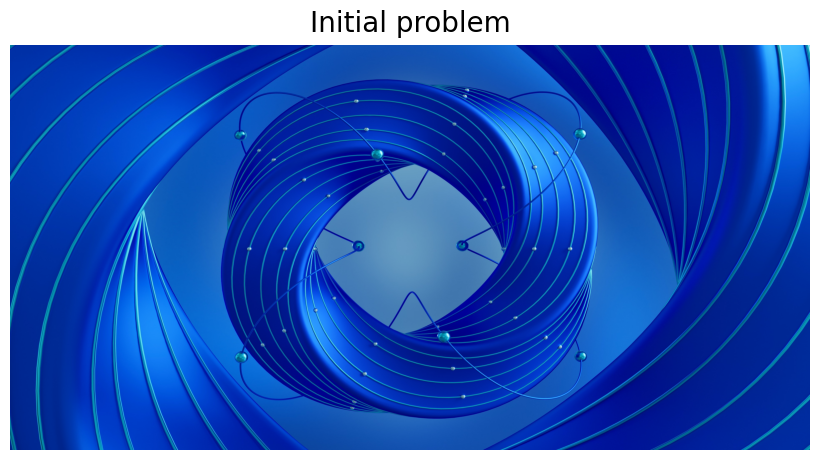

image


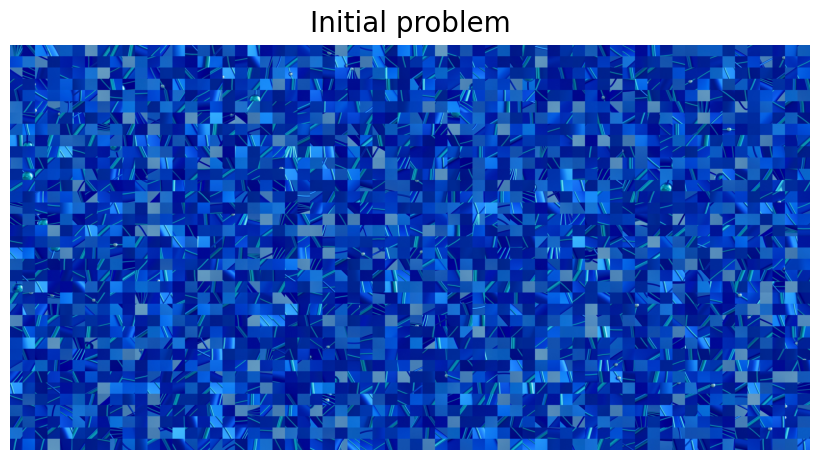

=== Pieces:      2304

intial


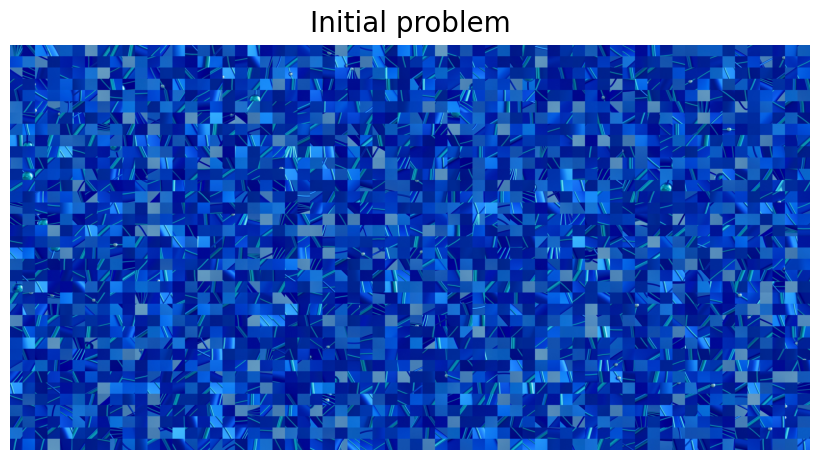

image
=== Analyzing image: ██████████████████████████████████████████████████ 100.0% 
bestfitness 0.1063395838200575


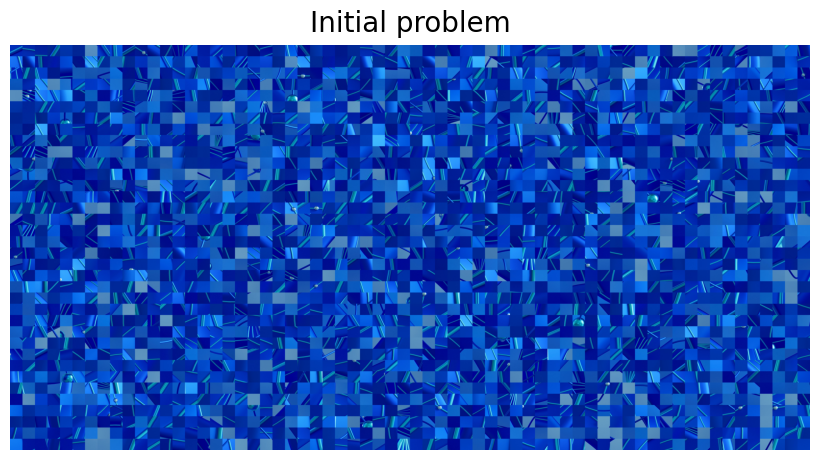

<Figure size 640x480 with 0 Axes>

bestfitness 0.37092962874576074


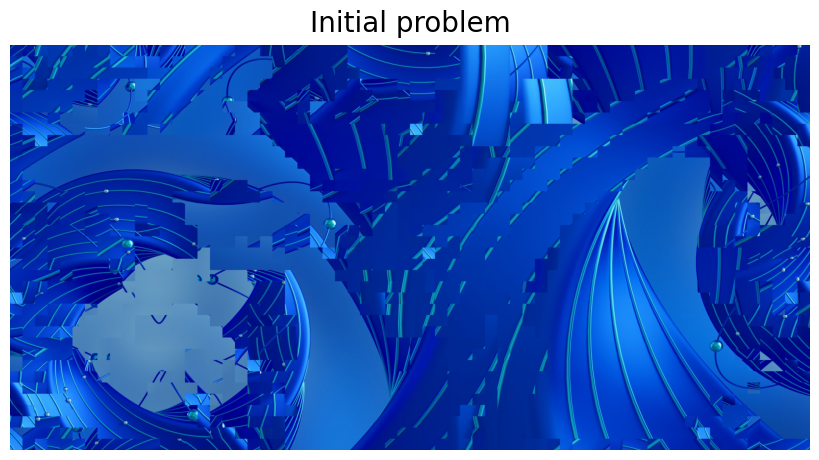

<Figure size 640x480 with 0 Axes>

bestfitness 0.623537629160183


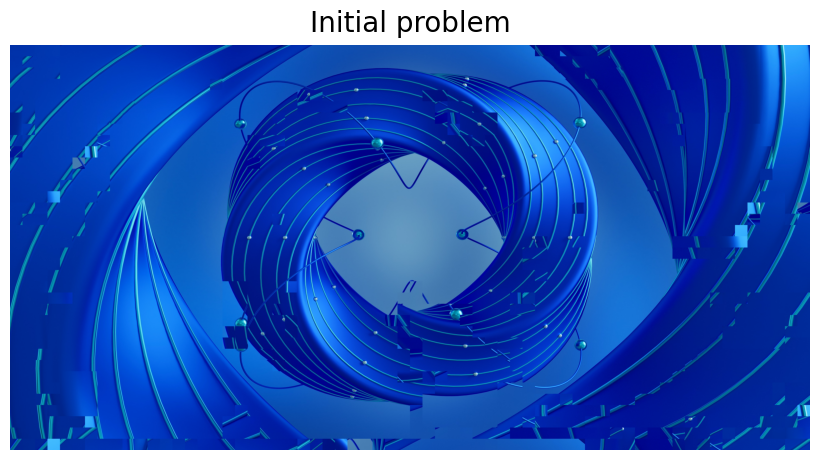

<Figure size 640x480 with 0 Axes>

bestfitness 0.793800165283568


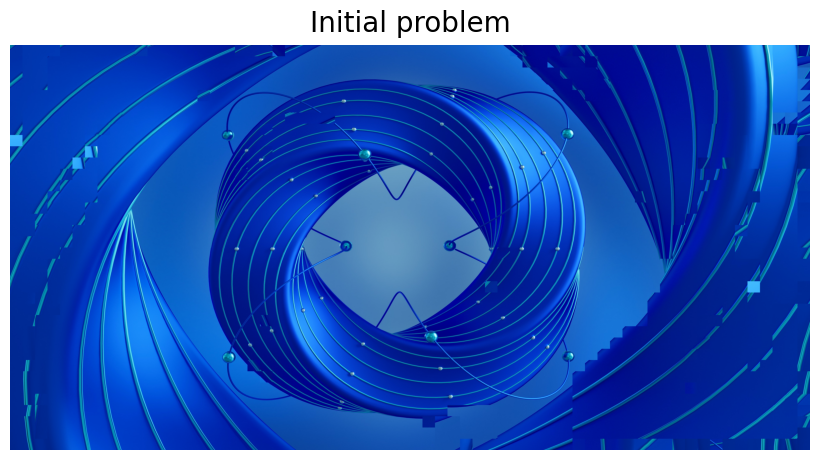

<Figure size 640x480 with 0 Axes>

bestfitness 0.8884379874593002


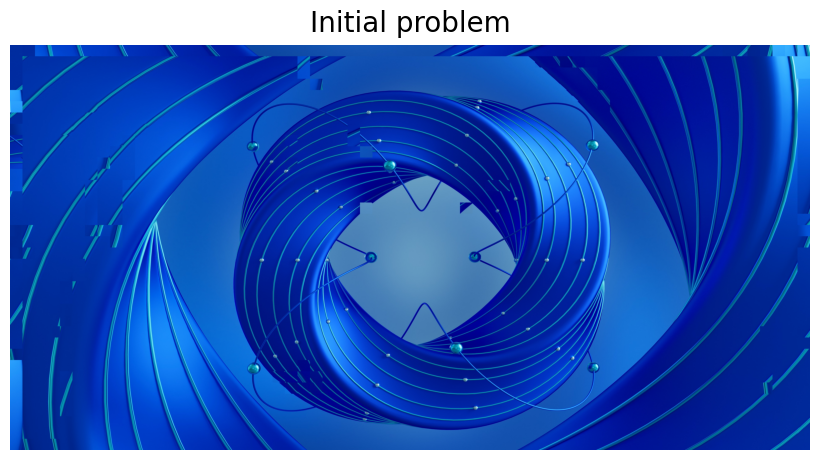

<Figure size 640x480 with 0 Axes>

bestfitness 0.8884379874593002


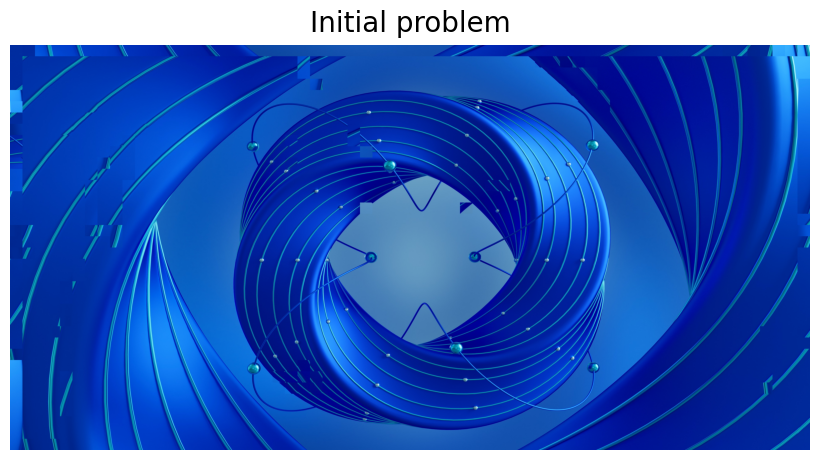

<Figure size 640x480 with 0 Axes>

bestfitness 0.8884379874593002


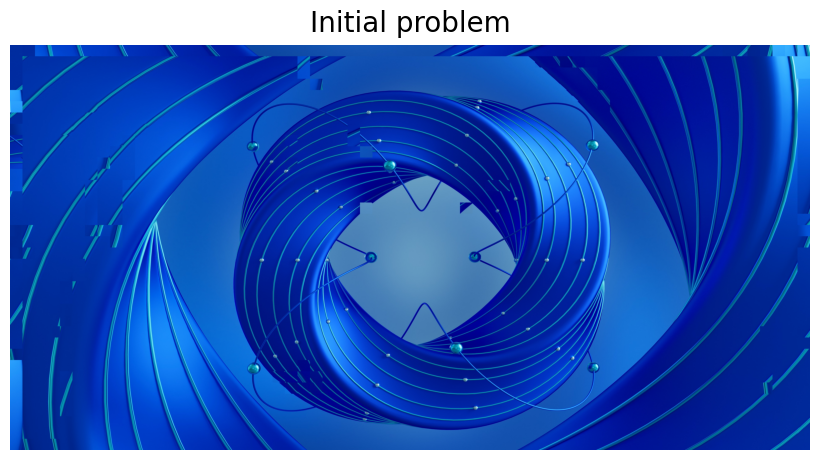

<Figure size 640x480 with 0 Axes>

bestfitness 0.8884379874593002


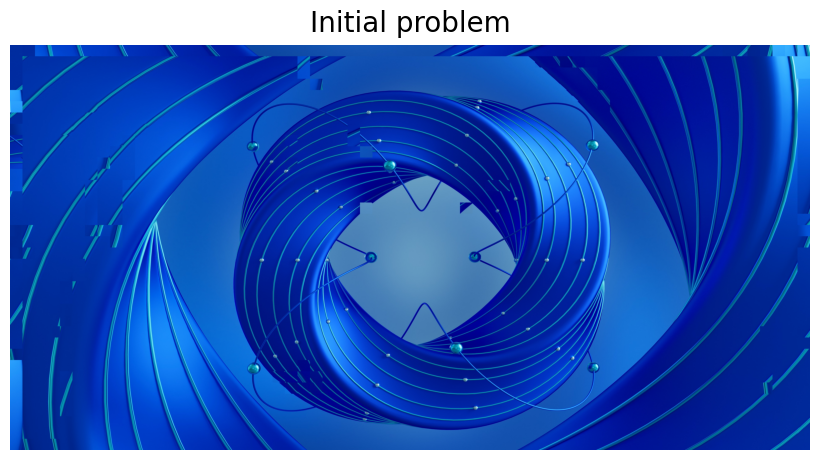

<Figure size 640x480 with 0 Axes>

bestfitness 0.8884379874593002


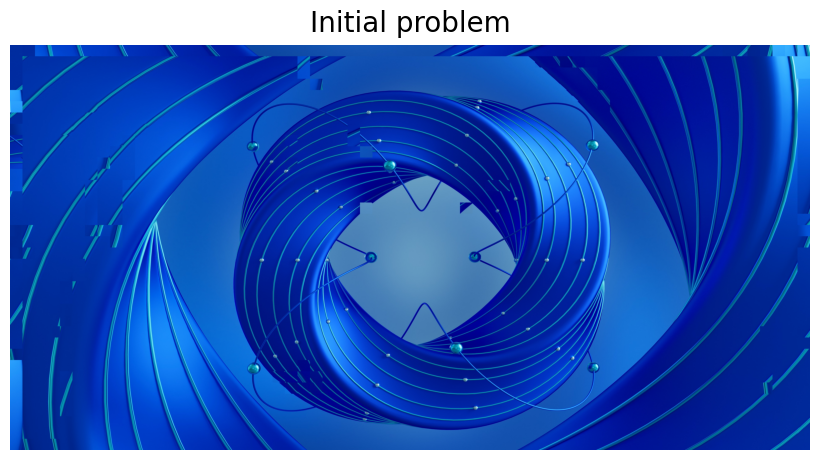

<Figure size 640x480 with 0 Axes>

In [ ]:
input_image = cv.imread("/mypackage/try.jpg")
#original image
print('intial')
plot = Plot(input_image)
print('image')

#variables:
size=60
generations=10
population_size=50

#create puzzle
pieces, rows, columns = flatten_image(input_image, size)

# Randomize pieces in order to make puzzle
np.random.shuffle(pieces)

# Create puzzle by stacking pieces
puzzle_image = assemble_image(pieces, rows, columns)
plot = Plot(puzzle_image)

debug=True

result = start_evolution(puzzle_image,size,population_size,generations)

output_image = result.to_image()

cv.imwrite("/mypackage/trysolution.jpg", output_image)